In [16]:
%matplotlib inline

In [17]:
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.constants import bar
import plotly.graph_objects as go

import GasNetSim as gns

# 1 Simulating the Irish 13 example grid

In [18]:
network_file_folder = Path('../examples/Irish13/')

In [19]:
network = gns.create_network_from_csv(network_file_folder)

In [20]:
network.simulation()

INFO:root:Initial pressure: [7000000.         7000000.         7000000.         6838017.44194865
 6953229.28266533 6783945.6441664  6777188.672568   6770784.83120522
 6778093.93510954 6650000.         6928258.74115342 6918696.83566645
 6920469.79778283]
INFO:root:Initial flow: [-60. -60. -60.  40.  30.  10.   5.   5.   5.  60.  10.   8.   7.]
INFO:GasNetSim.components.network:Simulation converges in 17 iterations.
INFO:GasNetSim.components.network:[7000000.         7000000.         7000000.         6909424.4676791
 6780382.37260298 6491729.73957498 6471131.02237547 6466169.96135421
 6464469.91297431 6435876.15193858 6718261.6236218  6713870.76844904
 6678358.59080405]


In [21]:
def interpolate_points(latitudes, longitudes, num_points=10):
    latitudes_interp = np.linspace(latitudes[:-1], latitudes[1:], num_points).flatten()
    longitudes_interp = np.linspace(longitudes[:-1], longitudes[1:], num_points).flatten()
    return latitudes_interp, longitudes_interp

In [22]:
import pandas as pd
import numpy as np

# Initialize lists to store latitudes, longitudes, and corresponding names
lats = []
lons = []
names = []
line_widths = []
line_lengths = []

# Process each pipeline to extract coordinates and associated information
for name, pipeline in network.pipelines.items():
    # Ensure both inlet and outlet coordinates are present
    if pipeline.inlet.longitude is None or pipeline.inlet.latitude is None or pipeline.outlet.longitude is None or pipeline.outlet.latitude is None:
        continue  # Skip pipelines without valid coordinates

    # Extract line width and length from the pipeline properties
    width = pipeline.flow_rate / 5  # Example calculation for line width
    length = pipeline.length / 1e3  # Convert length to kilometers

    # Append inlet point
    lats.append(pipeline.inlet.latitude)
    lons.append(pipeline.inlet.longitude)
    names.append(f'Pipeline {name}')
    line_widths.append(width)
    line_lengths.append(length)

    # Append outlet point
    lats.append(pipeline.outlet.latitude)
    lons.append(pipeline.outlet.longitude)
    names.append(f'Pipeline {name}')
    line_widths.append(width)
    line_lengths.append(length)

    # Add None to separate different lines in the visualization
    lats.append(None)
    lons.append(None)
    names.append(None)
    line_widths.append(None)
    line_lengths.append(None)

# Create a new DataFrame from the lists
df = pd.DataFrame({
    'lat': lats,
    'lon': lons,
    'name': names,
    'line_width': line_widths,
    'line_length': line_lengths
})

# Fill NaN values in line width and length with defaults
df['line_width'].fillna(1)
df['line_length'].fillna(1)

df

,lat,lon,name,line_width,line_length
0,55.35,-3.48,Pipeline 1,4.573926,550.0
1,53.21,-9.38,Pipeline 1,4.573926,550.0
2,NaN,NaN,None,NaN,NaN
3,55.35,-3.48,Pipeline 2,6.793639,350.0
4,53.42,-6.17,Pipeline 2,6.793639,350.0
5,NaN,NaN,None,NaN,NaN
6,53.19,-6.86,Pipeline 3,5.206356,50.0
7,53.42,-6.17,Pipeline 3,5.206356,50.0
8,NaN,NaN,None,NaN,NaN
9,52.76,-6.88,Pipeline 4,4.879867,15.0


In [23]:
df_nodes = pd.DataFrame()
df_nodes['name'] = [f'Node {i}' for i in range(13)]
df_nodes['lon'] = [n.longitude for n in network.nodes.values()]
df_nodes['lat'] = [n.latitude for n in network.nodes.values()]
df_nodes['flow'] = [n.volumetric_flow for n in network.nodes.values()]
df_nodes['pressure'] = [n.pressure for n in network.nodes.values()]
df_nodes['hydrogen concentration [%]'] = [n.gas_mixture.composition['hydrogen']*100 for n in network.nodes.values()]
df_nodes

,name,lon,lat,flow,pressure,hydrogen concentration [%]
0,Node 0,-3.48,55.35,-56.837787,7.000000e+06,0.02
1,Node 1,-9.96,54.39,-40.912119,7.000000e+06,0.02
2,Node 2,-7.91,51.65,-82.249641,7.000000e+06,0.02
3,Node 3,-9.38,53.21,40.000000,6.909424e+06,0.02
4,Node 4,-8.55,51.95,30.000000,6.780382e+06,0.02
5,Node 5,-6.88,52.76,10.000000,6.491730e+06,0.02
6,Node 6,-7.61,53.20,5.000000,6.471131e+06,0.02
7,Node 7,-7.37,53.59,5.000000,6.466170e+06,0.02
8,Node 8,-6.86,53.19,5.000000,6.464470e+06,0.02
9,Node 9,-6.17,53.42,60.000000,6.435876e+06,0.02


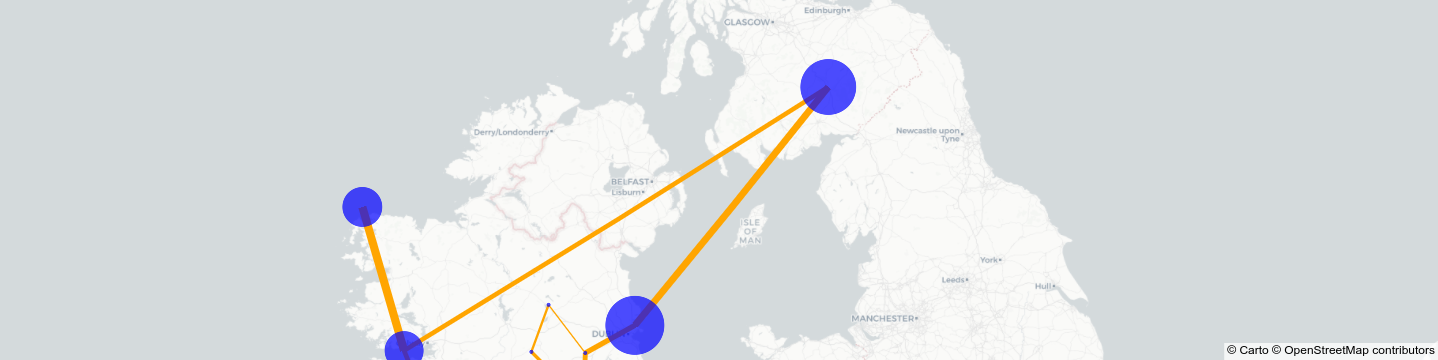

In [24]:
# Assuming df is your DataFrame

# Replace NaN line_width values with a default width
df['line_width'] = df['line_width'].fillna(2).infer_objects(copy=False)

fig = go.Figure()

for name, group in df.groupby('name'):
    # Interpolating points to make the line dense
    latitudes_interp, longitudes_interp = interpolate_points(group['lat'].values, group['lon'].values, int(group['line_length'].values[0]))

    hover_text = [
        f"{name}<br>Flow rate: {group['line_width'].iloc[0]*5:.2f}"
        for lat, lon in zip(latitudes_interp, longitudes_interp)
    ]
    
    fig.add_trace(go.Scattermapbox(
        lat=latitudes_interp,
        lon=longitudes_interp,
        hoverinfo='text',  
        text=hover_text,  # Use dynamic hover text
        mode='lines',  
        line=dict(width=group['line_width'].iloc[0], color='orange'),  
        name=name  
    ))


fig.add_trace(go.Scattermapbox(
    lat=df_nodes['lat'],
    lon=df_nodes['lon'],
    mode='markers',  # Use markers mode to display points
    marker=go.scattermapbox.Marker(size=abs(df_nodes['flow']), color='blue'),  # Customize marker appearance
    hoverinfo='text',  # Hover information will use the text
    text=[f"{name}<br>Pressure: {pressure/bar:.2f} bar<br>Nodal demand: {flow:.2f} sm^3/s<br>Hydrogen concentration: {h2_percentage:.2f} %"
          for name, pressure, flow, h2_percentage in zip(df_nodes['name'], df_nodes['pressure'], df_nodes['flow'], df_nodes['hydrogen concentration [%]'])]
))


fig.update_layout(
    # mapbox_style="open-street-map",
    mapbox_style="carto-positron",
    showlegend=False,
    mapbox_zoom=1,
    mapbox_center_lon=-8,
    mapbox_center_lat=53,
    margin={"r": 0, "t": 0, "l": 0, "b": 0}
)

fig.update_layout(mapbox_bounds={"west": -15, "east": 5, "south": 30, "north": 70})

fig.show()

In [25]:
network_file_folder = Path('../examples/Irish13_h2_injections/')

In [26]:
network = gns.create_network_from_csv(network_file_folder)

In [27]:
network.simulation()

INFO:root:Initial pressure: [7000000.         7000000.         7000000.         6838017.44194865
 6783945.6441664  6770784.83120522 6838017.44194865 6953229.28266533
 6783945.6441664  6777188.672568   6770784.83120522 6778093.93510954
 6650000.         6928258.74115342 6918696.83566645 6920469.79778283]
INFO:root:Initial flow: [-55. -55. -55.  -5.  -5.  -5.  40.  30.  10.   5.   5.   5.  60.  10.
   8.   7.]
INFO:GasNetSim.components.network:Simulation converges in 17 iterations.
INFO:GasNetSim.components.network:[7000000.         7000000.         7000000.         6838017.44194865
 6783945.6441664  6770784.83120522 6929199.96355301 6813208.80804416
 6595569.66976306 6576173.47593628 6572075.97716354 6569467.401242
 6530598.38171001 6751377.28511415 6746981.12078545 6711288.63858646]


In [28]:
import pandas as pd
import numpy as np

# Initialize lists to store latitudes, longitudes, and corresponding names
lats = []
lons = []
names = []
line_widths = []
line_lengths = []

# Process each pipeline to extract coordinates and associated information
for name, pipeline in network.pipelines.items():
    # Ensure both inlet and outlet coordinates are present
    if pipeline.inlet.longitude is None or pipeline.inlet.latitude is None or pipeline.outlet.longitude is None or pipeline.outlet.latitude is None:
        continue  # Skip pipelines without valid coordinates

    # Extract line width and length from the pipeline properties
    width = pipeline.flow_rate / 5  # Example calculation for line width
    length = pipeline.length / 1e3  # Convert length to kilometers

    # Append inlet point
    lats.append(pipeline.inlet.latitude)
    lons.append(pipeline.inlet.longitude)
    names.append(f'Pipeline {name}')
    line_widths.append(width)
    line_lengths.append(length)

    # Append outlet point
    lats.append(pipeline.outlet.latitude)
    lons.append(pipeline.outlet.longitude)
    names.append(f'Pipeline {name}')
    line_widths.append(width)
    line_lengths.append(length)

    # Add None to separate different lines in the visualization
    lats.append(None)
    lons.append(None)
    names.append(None)
    line_widths.append(None)
    line_lengths.append(None)

# Create a new DataFrame from the lists
df = pd.DataFrame({
    'lat': lats,
    'lon': lons,
    'name': names,
    'line_width': line_widths,
    'line_length': line_lengths
})

# Fill NaN values in line width and length with defaults
df['line_width'].fillna(1)
df['line_length'].fillna(1)

0     550.0
1     550.0
2       1.0
3     350.0
4     350.0
5       1.0
6      50.0
7      50.0
8       1.0
9      15.0
10     15.0
11      1.0
12     20.0
13     20.0
14      1.0
15     18.0
16     18.0
17      1.0
18      8.0
19      8.0
20      1.0
21     25.0
22     25.0
23      1.0
24     70.0
25     70.0
26      1.0
27     65.0
28     65.0
29      1.0
30    150.0
31    150.0
32      1.0
33    135.0
34    135.0
35      1.0
36     15.0
37     15.0
38      1.0
39     13.0
40     13.0
41      1.0
Name: line_length, dtype: float64

In [29]:
df_nodes = pd.DataFrame()
df_nodes['name'] = [f'Node {i}' for i in network.nodes.keys()]
df_nodes['lon'] = [n.longitude for n in network.nodes.values()]
df_nodes['lat'] = [n.latitude for n in network.nodes.values()]
df_nodes['flow'] = [n.volumetric_flow for n in network.nodes.values()]
df_nodes['pressure'] = [n.pressure for n in network.nodes.values()]
df_nodes['hydrogen concentration [%]'] = [n.gas_mixture.composition['hydrogen']*100 for n in network.nodes.values()]
df_nodes

,name,lon,lat,flow,pressure,hydrogen concentration [%]
0,Node 1,-3.48,55.35,-52.296890,7.000000e+06,0.020000
1,Node 2,-9.96,54.39,-36.491601,7.000000e+06,0.020000
2,Node 3,-7.91,51.65,-76.211201,7.000000e+06,0.020000
3,Node 4,-9.38,53.21,-5.000000,6.838017e+06,100.000000
4,Node 5,-6.88,52.76,-5.000000,6.783946e+06,100.000000
5,Node 6,-7.37,53.59,-5.000000,6.770785e+06,100.000000
6,Node 7,-9.38,53.21,40.000000,6.929200e+06,8.010420
7,Node 8,-8.55,51.95,30.000000,6.813209e+06,1.845208
8,Node 9,-6.88,52.76,10.000000,6.595570e+06,11.907437
9,Node 10,-7.61,53.20,5.000000,6.576173e+06,11.907437


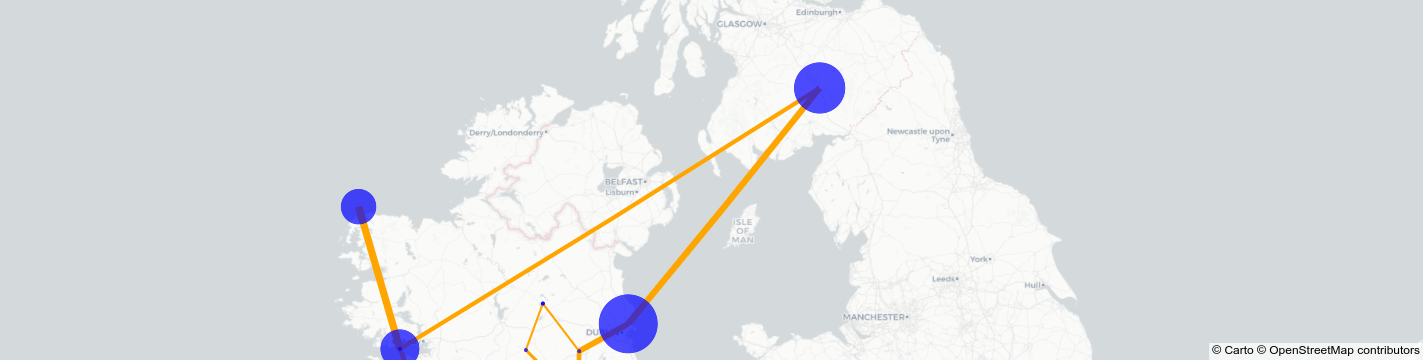

In [30]:
# Assuming df is your DataFrame

# Replace NaN line_width values with a default width
df['line_width'] = df['line_width'].fillna(2).infer_objects(copy=False)

fig = go.Figure()

for name, group in df.groupby('name'):
    # Interpolating points to make the line dense
    latitudes_interp, longitudes_interp = interpolate_points(group['lat'].values, group['lon'].values, int(group['line_length'].values[0]))

    hover_text = [
        f"{name}<br>Flow rate: {group['line_width'].iloc[0]*5:.2f}"
        for lat, lon in zip(latitudes_interp, longitudes_interp)
    ]
    
    fig.add_trace(go.Scattermapbox(
        lat=latitudes_interp,
        lon=longitudes_interp,
        hoverinfo='text',  
        text=hover_text,  # Use dynamic hover text
        mode='lines',  
        line=dict(width=group['line_width'].iloc[0], color='orange'),  
        name=name  
    ))


fig.add_trace(go.Scattermapbox(
    lat=df_nodes['lat'],
    lon=df_nodes['lon'],
    mode='markers',  # Use markers mode to display points
    marker=go.scattermapbox.Marker(size=abs(df_nodes['flow']), color='blue'),  # Customize marker appearance
    hoverinfo='text',  # Hover information will use the text
    text=[f"{name}<br>Pressure: {pressure/bar:.2f} bar<br>Nodal demand: {flow:.2f} sm^3/s<br>Hydrogen concentration: {h2_percentage:.2f} %"
          for name, pressure, flow, h2_percentage in zip(df_nodes['name'], df_nodes['pressure'], df_nodes['flow'], df_nodes['hydrogen concentration [%]'])]
))


fig.update_layout(
    # mapbox_style="open-street-map",
    mapbox_style="carto-positron",
    showlegend=False,
    mapbox_zoom=1,
    mapbox_center_lon=-8,
    mapbox_center_lat=53,
    margin={"r": 0, "t": 0, "l": 0, "b": 0}
)

fig.update_layout(mapbox_bounds={"west": -15, "east": 5, "south": 30, "north": 70})

fig.show()